<a href="https://colab.research.google.com/github/bharath967/airbnb_data_analysis/blob/main/Airbnb_Bookings_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
path='/content/drive/MyDrive/Almabetter/ Airbnb Bookings Analysis-Bharath Kumar A/Airbnb NYC 2019.csv'

since the drive is mounted we can start importinf libraries and perform analysis

In [118]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [119]:
#setting the path of the dataset and we can start reading the data
airbnb=pd.read_csv(path)

#we can take sneak peek at the first 5 rows of our dataset
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [120]:
#we can use the tail() to view the last 5 rows of this dataset
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [121]:
# we can check the shape of our dataset using 'shape'
airbnb.shape

(48895, 16)

we can see from above that this dataset contains 16 columns and 48895 records contained in it

**cleaning the data**

---



In [122]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

we can observe from above that several columns contain null values as the total records is 48895

In [123]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

we can observe that there are several null values

In [124]:
# we can get the list of columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [125]:
airbnb.drop(['last_review','calculated_host_listings_count'],axis=1,inplace=True)

we can drop two columns from the dataset as it does not have any value for our analysis

In [126]:
#we can get the updated dataset using 'head'
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


In [127]:
# we can check for the shape of our dataset
airbnb.shape

(48895, 14)

In [128]:
#check for any null values and sum it so that we understand how many null values are there
airbnb.isna().sum()

id                         0
name                      16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

we can observe that the columns 'name','host_name' and 'reviews_per_month' have missing values.
so we can replace the missing values in 'name' as 'no name'
and replace missing values 'host_name' as 'no host name;
also replace missing values 'review_per_month' as '0'

In [129]:
#replace null value with '0'
airbnb['reviews_per_month'].fillna(0,inplace=True)

In [130]:
airbnb.isna().sum()

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month       0
availability_365        0
dtype: int64

In [131]:
#replace null value with 'no name'
airbnb['name'].fillna('no name',inplace=True)

#replace null value with 'no name'
airbnb['host_name'].fillna('no host name',inplace=True)

In [132]:
airbnb.host_name.isnull().sum()

0

In [133]:
airbnb.isna().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

In [134]:
#check if there is any duplicate values insite the dataset
airbnb.duplicated().sum()

0

**from above its clear that we don't have any duplicates in the dataset**

In [135]:
airbnb.shape

(48895, 14)

In [136]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,365.000000


In [137]:
#we can use 'dtypes' to get all the data types of each columns
airbnb.dtypes

id                       int64
name                    object
host_id                  int64
host_name               object
neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
availability_365         int64
dtype: object

In [139]:
#check for unique columns
airbnb.nunique()

id                     48895
name                   47906
host_id                37457
host_name              11453
neighbourhood_group        5
neighbourhood            221
latitude               19048
longitude              14718
room_type                  3
price                    674
minimum_nights           109
number_of_reviews        394
reviews_per_month        938
availability_365         366
dtype: int64

**In detail about various columsn present in dataset**
* name- name of the host 

* host_id- unique id of host

* host_name - name of the host

* neighbourhood_group- location name in new yoke city

* neighbourhood- particular area in neighbourhood group

* latitude- horizantal co-ordinates/location for respective host

* longitude- vertical co-ordinates/location for respective host

* room_type - Type of rooms

* price- price charged by host

* minimum_nights- it is the minimum nights for which booking is done

* number_of_reviews- total reviews given to the host

* reviews_per_month- its average reviews given by customer to the host per month

* availability_365- host available in a year given in number of days.

                                             ** What can we learn from predictions? **

**What can we learn about prices**

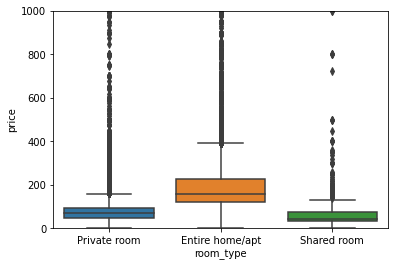

In [140]:
#lets compare the prices of rooms of differnt types
plt.ylim(0,1000)
sns.boxplot(x='room_type', y='price',data=airbnb)
plt.show()

we can observe that the price starts from 0 till 1000. clearly there are outliers as no one will give price of 0. 
we cannot drop these outliers so we will try to minimize these outliers **bold text**

In [141]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

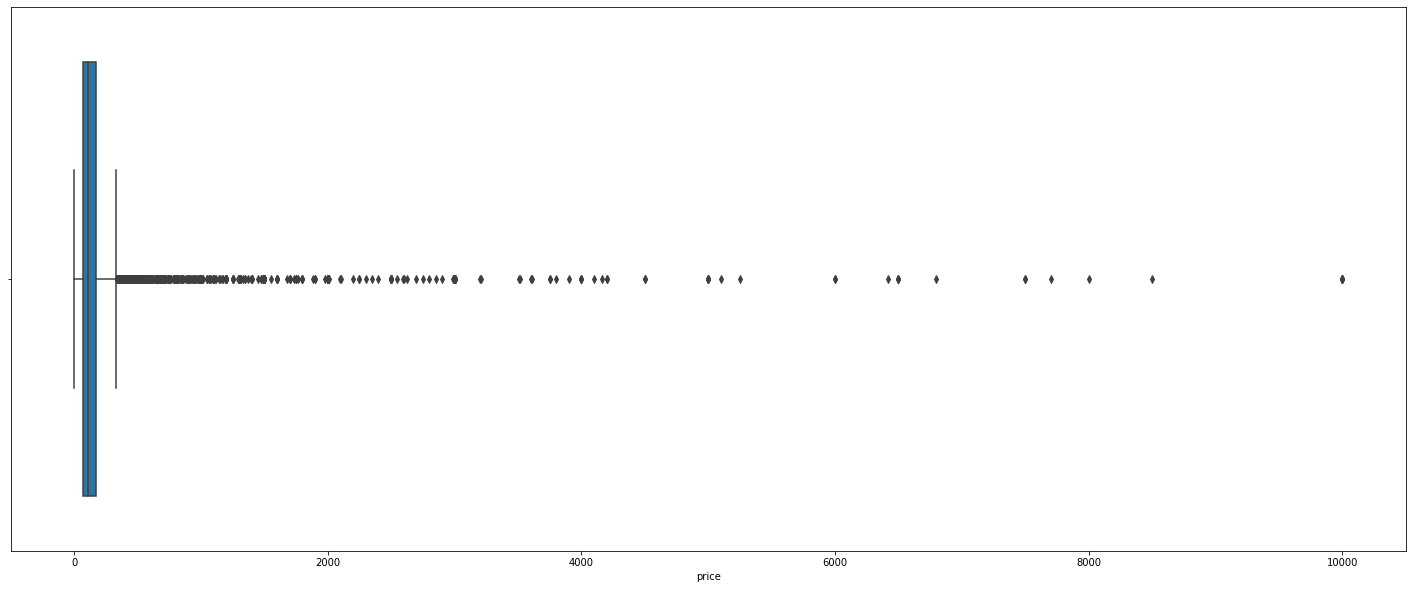

In [142]:
plt.figure(figsize=(25,10))
sns.boxplot(x=airbnb['price'])

**we can observe the outliers present in tha datset from above**

In [143]:
#we can get thr length of all the prices above 500
len(airbnb[airbnb['price']>500])

1044

In [144]:
airbnb['price'][airbnb['price']>600] = 600

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


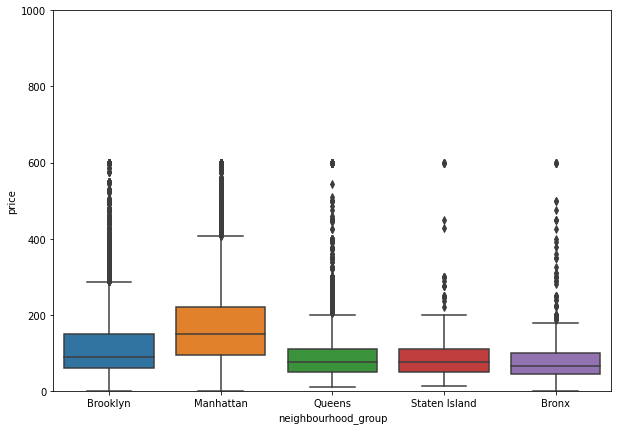

In [145]:
plt.figure(figsize=(10,7))
plt.ylim(0,1000)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb)
plt.show()

In [146]:
airbnb.groupby(['neighbourhood_group'],dropna=True)['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

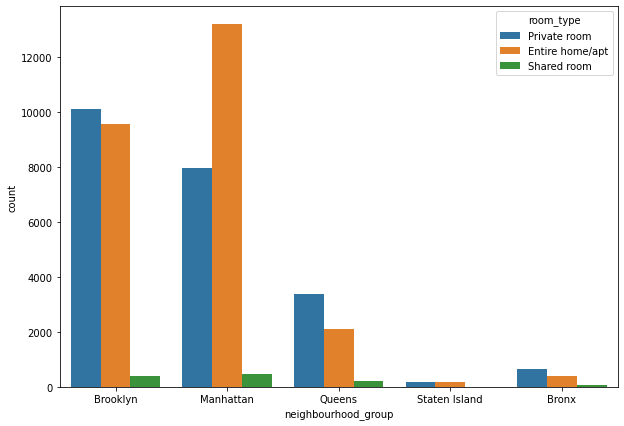

In [147]:
plt.figure(figsize=(10,7))
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb)
plt.show()

**from above diagram we can see that most of the hotels are present in the neighbourhood of 'Brooklyn and 'Manhattan' 
and less hotels rooms are at 'Staten island' and 'bronx'**

**hosts and their reviews**

In [148]:
#we can get the review from differnt neighbourhoods and their count
neighbourhood_reviews = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
neighbourhood_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


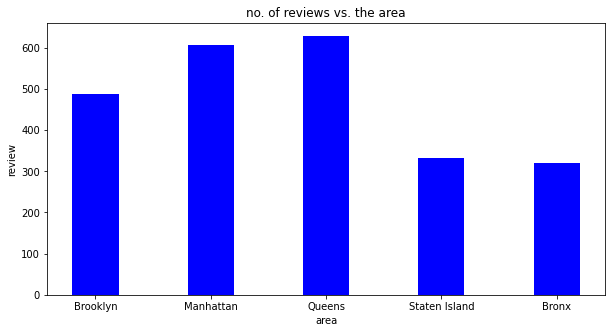

In [149]:
area = airbnb['neighbourhood_group']
review = airbnb['number_of_reviews']
fig = plt.figure(figsize = (10, 5))
plt.bar(area, review, color ='blue', width = 0.4)
plt.xlabel("area")
plt.ylabel("review")
plt.title("no. of reviews vs. the area")
plt.show()

**from above bar graph we can see that most of the review came from queens and manhattan**

In [150]:
price_per_area = airbnb.groupby(['price'])['number_of_reviews'].max().reset_index()
price_per_area.head()

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


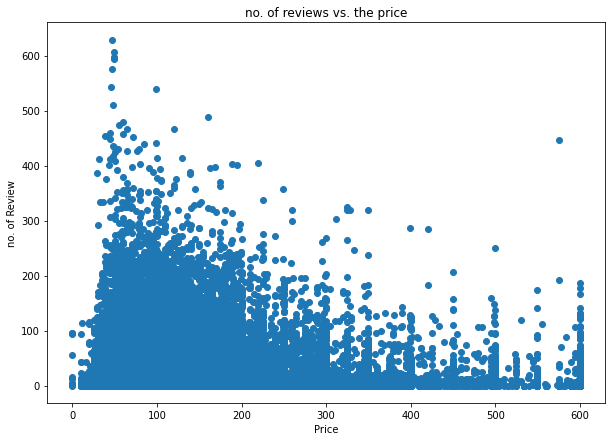

In [160]:
fig = plt.figure(figsize = (10, 7))
area = airbnb['price']
price = airbnb['number_of_reviews']
plt.scatter( area, price)
plt.xlabel("Price")
plt.ylabel("no. of Review")
plt.title("no. of reviews vs. the price")
plt.show()
 

**from above diagram we can say that most people who reviewed prefer rooms with low cost**

In [152]:
maxi_price=airbnb.sort_values(by='price',axis=0,ascending=False)
maxi_price

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
46137,35098251,Rare Spacious City Apartment - WIFI & GYM,28464830,Sam,Manhattan,Murray Hill,40.74653,-73.97891,Entire home/apt,600,3,2,1.71,84
23813,19226980,Brownstone Living,33365473,Paul,Brooklyn,Bedford-Stuyvesant,40.68090,-73.94271,Entire home/apt,600,31,0,0.00,358
37978,30019462,Beautiful Times Square Apt. Heart of Manhattan!,219848970,Javier,Manhattan,Hell's Kitchen,40.76203,-73.99353,Entire home/apt,600,3,0,0.00,17
30722,23766156,TheBlueHouse. EntireHome. BabyGrand. FreeParking.,178266385,Megan,Brooklyn,Cypress Hills,40.68012,-73.89338,Entire home/apt,600,1,3,0.21,362
23865,19261720,Oceanfront vacation home on Rockaway Beach,6988611,Jill,Queens,Arverne,40.58781,-73.79317,Entire home/apt,600,3,0,0.00,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,73
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,222
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,127
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,333


**neighbourhoods and its price per night**

In [153]:
maxi_price['price_per_night']= round(maxi_price['price']/ maxi_price['minimum_nights'], 2)

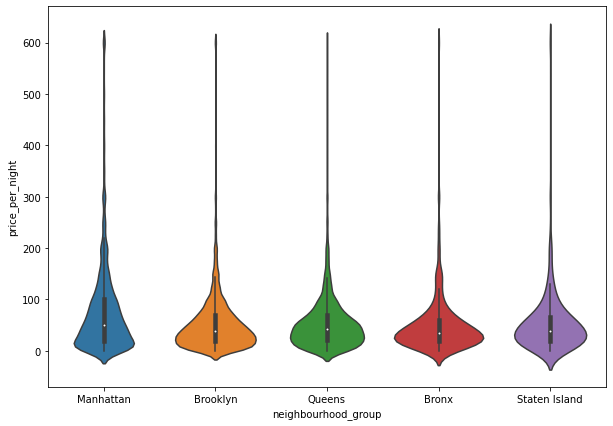

In [154]:
#plotting violin plot between areas and price per night
plt.figure(figsize=(10,7))
sns.violinplot(x= 'neighbourhood_group',y= 'price_per_night',data= max_price)

**What can we learn about different hosts**

In [155]:
top_expensive_hosts=max_price.sort_values(by='price_per_night',ascending=False).head(3)
top_expensive_hosts

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price_per_night
41523,32284628,Modern Ground FL Event Space on Infamous 5th Ave,11520555,Mike,Manhattan,East Harlem,40.80129,-73.94466,Entire home/apt,600,1,15,3.52,91,600.0
37136,29517566,Stunning 4BDRM/2BTH Duplex Loft Best Neighborh...,222086035,Vic,Manhattan,Lower East Side,40.71856,-73.98485,Entire home/apt,600,1,29,3.57,256,600.0
3594,2149184,Super Bowl Rental 2BR in Soho,7363831,Garrett,Manhattan,SoHo,40.72615,-74.00123,Entire home/apt,600,1,0,0.00,0,600.0


In [156]:
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

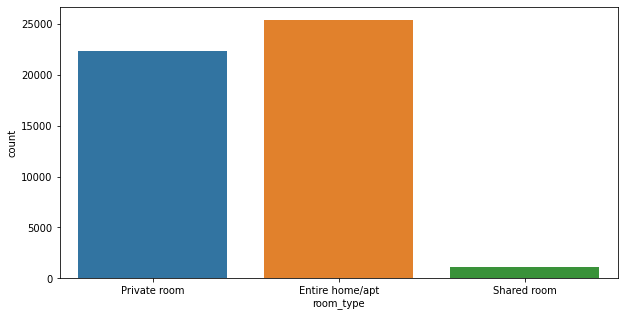

In [157]:
plt.figure(figsize= (10,5))
sns.countplot(x= 'room_type', data= airbnb)
plt.show()

from above bar graph we can tell that most people prefer 'entire home/apartnment' type room
and less people refer 'shared room type'

In [158]:
avg_price= airbnb.groupby([ 'neighbourhood_group','room_type'],dropna = True)['price'].mean().reset_index()
avg_price

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,126.266491
1,Bronx,Private room,63.751534
2,Bronx,Shared room,56.466667
3,Brooklyn,Entire home/apt,168.437389
4,Brooklyn,Private room,73.328563
5,Brooklyn,Shared room,50.225182
6,Manhattan,Entire home/apt,223.726797
7,Manhattan,Private room,109.401027
8,Manhattan,Shared room,87.310417
9,Queens,Entire home/apt,142.643130


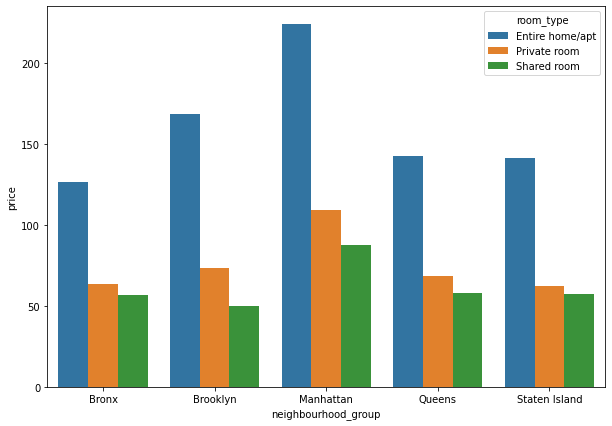

In [162]:
plt.figure(figsize= (10,7))
sns.barplot(x= 'neighbourhood_group',y='price', hue= 'room_type', data= avg_price)
plt.show()

the above bar plot shows the average proce of earch room type in differnt neighbourhood

In [210]:
top_host=airbnb['host_id'].value_counts().head(10)
top_host=pd.DataFrame(top_host)
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'host_id','host_id':'total'},inplace=True)
top_host

,host_id,total
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

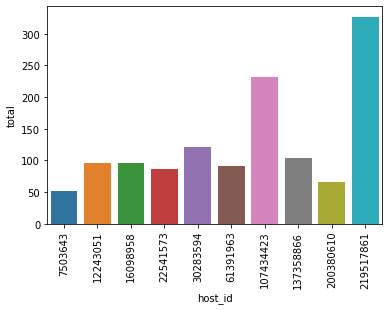

In [211]:
plt = sns.barplot(x='host_id',y='total',data=top_host)
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)

**top hosts with maximum number of bookings**

In [212]:
top_host_name = top_host['host_id'][top_host['total']==top_host['total'].max()]
top_host_name1 = airbnb[['host_name','neighbourhood_group']][airbnb['host_id']==top_host_name[0]].head(1)
top_host_name1

,host_name,neighbourhood_group
38293,Sonder (NYC),Manhattan


**What can we learn about different neighbourhoods**

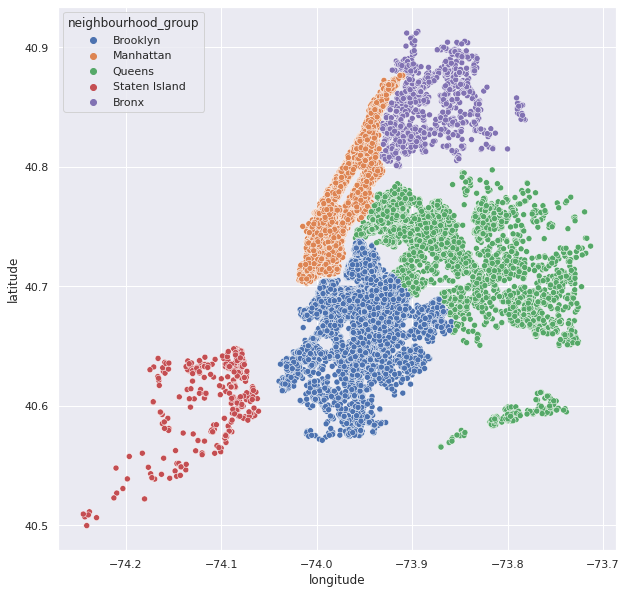

In [215]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude,hue=airbnb.neighbourhood_group)

**new york map with different neighbourhoods**

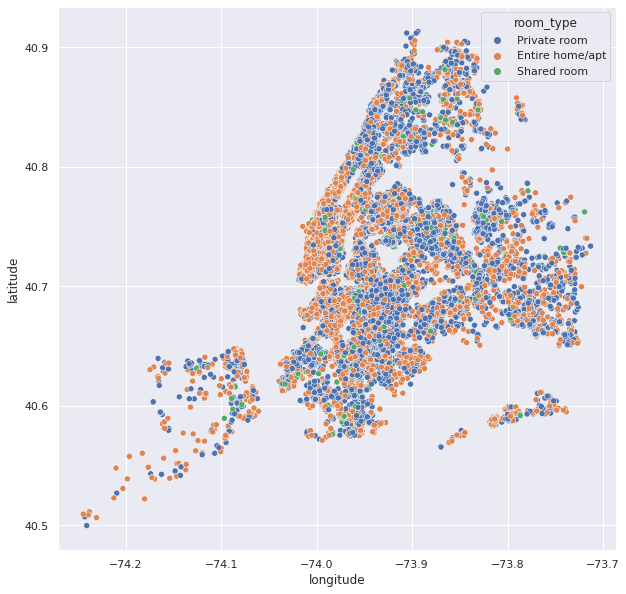

In [216]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude,hue=airbnb.room_type)

**new york map with differnt kinds of rooms across it**

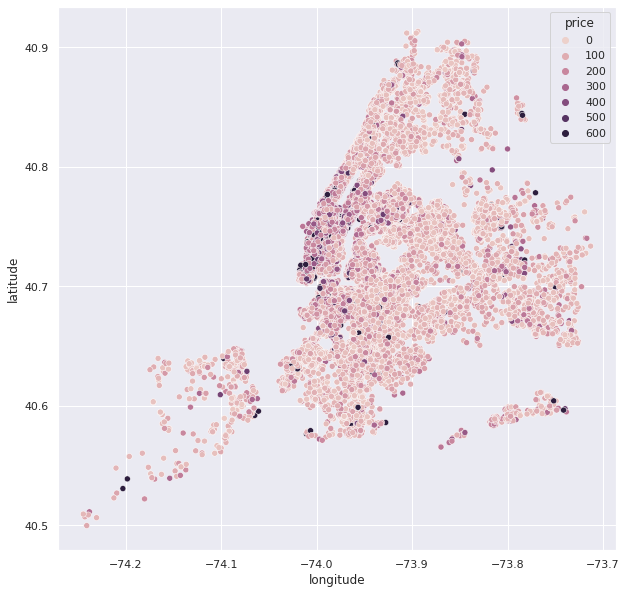

In [217]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude,hue=airbnb.price)

**new york map with differnt price ranges**

                          **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [221]:
manhattan=airbnb[airbnb['neighbourhood_group']=='Manhattan']
brooklyn=airbnb[airbnb['neighbourhood_group']=='Brooklyn']
queens=airbnb[airbnb['neighbourhood_group']=='Queens']
staten_island=airbnb[airbnb['neighbourhood_group']=='Staten Island']
bronx=airbnb[airbnb['neighbourhood_group']=='Bronx']

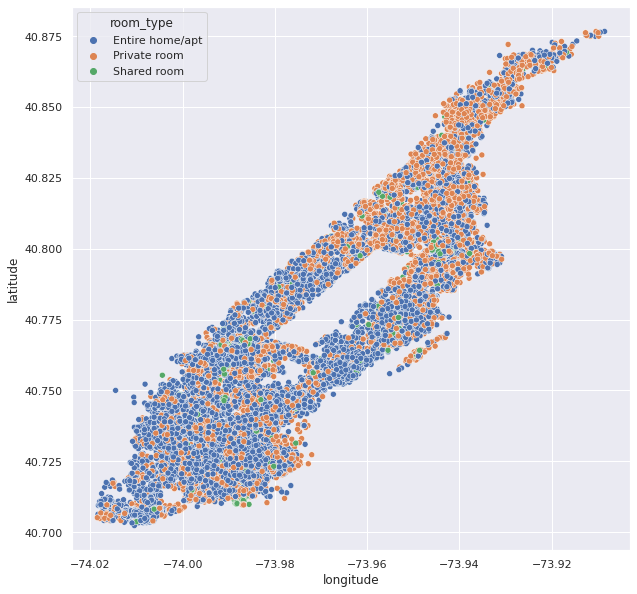

In [231]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=manhattan.longitude,y=manhattan.latitude,hue=manhattan.room_type)

**from manhattan map we can observe that entire home/apt dominate**

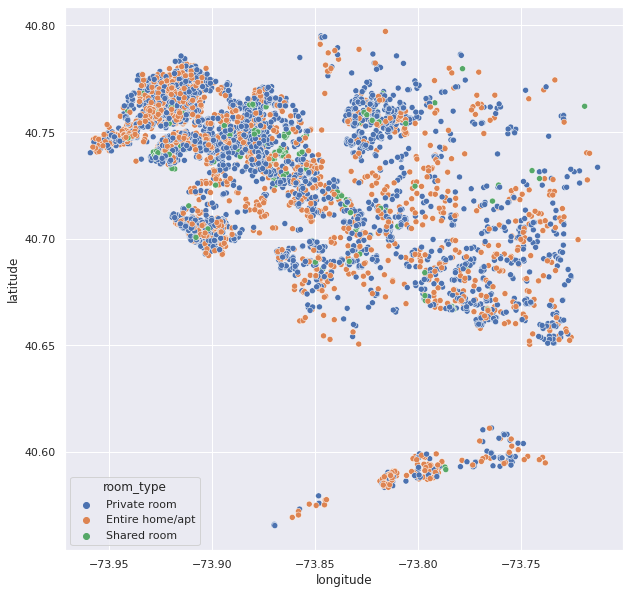

In [232]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=queens.longitude,y=queens.latitude,hue=queens.room_type)

**from queens map we can observe that people prefer private rooms are more then others**

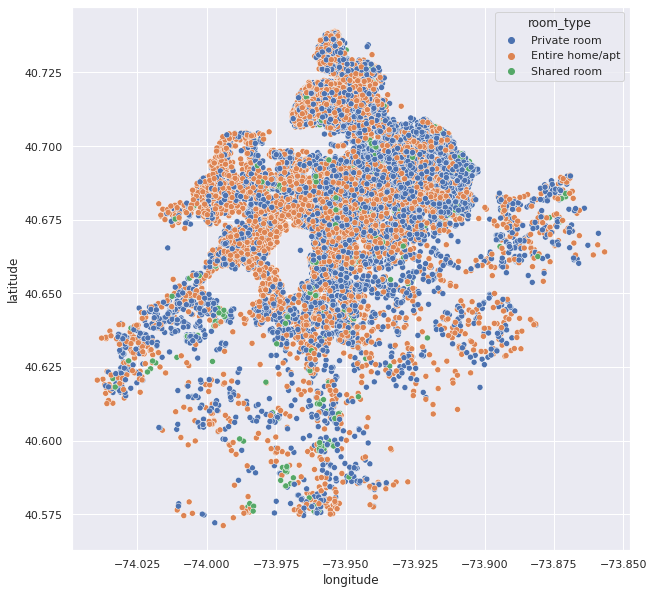

In [233]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=brooklyn.longitude,y=brooklyn.latitude,hue=brooklyn.room_type)

**from brooklyn map homr/apt rooms are prefered**

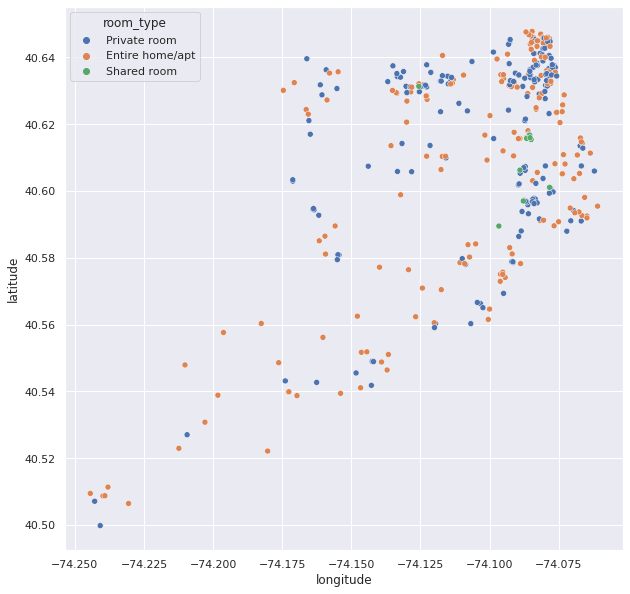

In [236]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=staten_island.longitude,y=staten_island.latitude,hue=staten_island.room_type)

**from staten island map rooms/apt are more prefered**

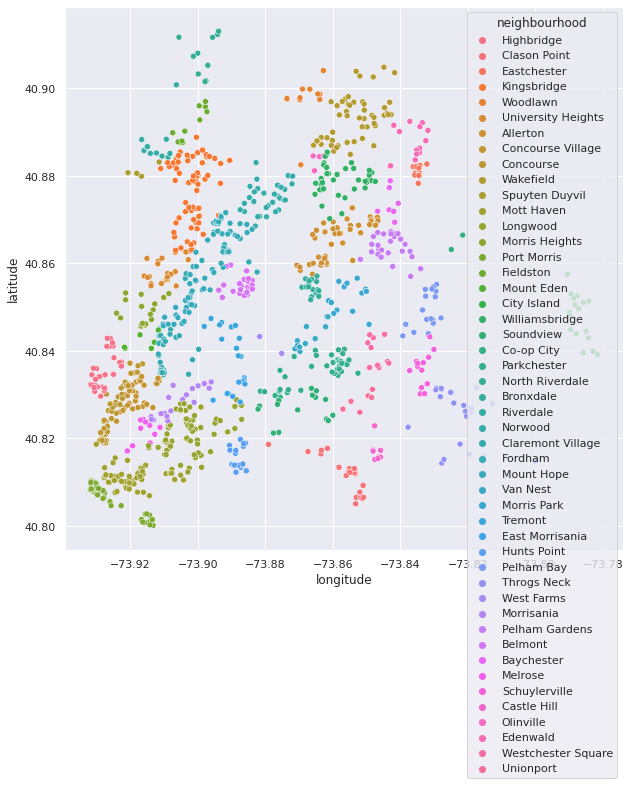

In [228]:
sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(x=bronx.longitude,y=bronx.latitude,hue=bronx.neighbourhood)

**bronx map with its neighbourhood with hotel rooms**

***conclusion***


* most people prefer **home/apartment** type rooms all over **new york**
* most people from** brooklyn ** prefer **private rooms**
* most perople from **manhattan** prefer **home/apartment** rooms
* most people from **queens** prefer **private rooms**
* most people from **staten islands** prefer both **private and home/apartment rooms**
* most people from **bronx** prefer private **rooms**


* **people who gave reviews** prefer **rooms with low prices** and majority of the prople who gave review are from **queens**
people who gave maximun prices to rooms are from manhattan
* majority of** prices** are in between **200-300**
**top 10 hosts** with maximum spending prefered **manhattan**

* **mantattan neighbourhood shows promising**
